<a href="https://colab.research.google.com/github/mlacasa/Regression/blob/main/RegressionNoLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lazypredict

In [ ]:
import plotly.graph_objs as go
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split



# Cargamos los datos para evaluar el coeficiente de Correlación

In [ ]:
## creamos los datos

Xmetros = np.arange(0,5,0.01)
Pendiente = 2.5


Yprecio = []
for num in Xmetros:
  Yprecio.append(math.sin(num))
Yprecio1 = []
for num in Xmetros:
  Yprecio1.append(math.sin(num) + np.random.uniform(-0.1,0.1)+1)

Yprecio2 = []
for num in Xmetros:
  Yprecio2.append(math.sin(num) + np.random.normal(-0.1,0.1)+1)

trace0 = go.Scatter(x = Xmetros, y = Yprecio , mode = 'markers', name= '0.5x')
trace1 = go.Scatter(x = Xmetros, y = Yprecio1 , mode = 'markers', name= '0.5x+uniform')
trace2 = go.Scatter(x = Xmetros, y = Yprecio2 , mode = 'markers', name= '0.5x+normal')

data = [trace0, trace1, trace2]

layout = go.Layout(title='Ejemplo Datos Alta correlación')
fig = go.Figure(data = data, layout = layout )
#pyo.plot(fig)
fig.show()

In [ ]:
np.corrcoef(Xmetros, Yprecio)

array([[ 1.        , -0.80929342],
       [-0.80929342,  1.        ]])

In [ ]:
np.corrcoef(Xmetros, Yprecio1)

array([[ 1.        , -0.81131818],
       [-0.81131818,  1.        ]])

In [ ]:
np.corrcoef(Xmetros, Yprecio2)

array([[ 1.        , -0.80169713],
       [-0.80169713,  1.        ]])

In [ ]:
import statsmodels.api as sm                # Este proporciona funciones para la estimación de muchos modelos estadísticos
import statsmodels.formula.api as smf       # Permite ajustar modelos estadísticos utilizando fórmulas de estilo R

df = pd.DataFrame(list(zip(Xmetros, Yprecio, Yprecio1, Yprecio2)), columns= ['metros', 'sinRuido', 'uniform', 'Normal'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
df.head()

,metros,sinRuido,uniform,Normal
0,0.00,0.000000,0.978553,0.915696
1,0.01,0.010000,0.925558,0.963324
2,0.02,0.019999,1.081797,0.718871
3,0.03,0.029996,1.037728,0.898541
4,0.04,0.039989,1.048314,1.134917


In [ ]:
X = sm.add_constant(df['metros']) # Añado la variable X
y = df['sinRuido']

In [ ]:
mod = sm.OLS(y, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:               sinRuido   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     945.3
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          3.76e-117
Time:                        18:08:02   Log-Likelihood:                -272.89
No. Observations:                 500   AIC:                             549.8
Df Residuals:                     498   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1388      0.037     30.472      0.0

In [ ]:
y1 = df['uniform']

mod = sm.OLS(y1, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())



                            OLS Regression Results                            
Dep. Variable:                uniform   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     943.0
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          5.56e-117
Time:                        18:08:06   Log-Likelihood:                -274.03
No. Observations:                 500   AIC:                             552.1
Df Residuals:                     498   BIC:                             560.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1391      0.037     57.108      0.0

In [ ]:
y2 = df['Normal']

mod = sm.OLS(y2, X).fit()              # sm.OLS(respuesta, entrada)
predictions = mod.predict(X)
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Normal   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     875.2
Date:                Wed, 25 Aug 2021   Prob (F-statistic):          9.24e-112
Time:                        18:08:09   Log-Likelihood:                -288.67
No. Observations:                 500   AIC:                             581.3
Df Residuals:                     498   BIC:                             589.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0345      0.039     52.747      0.0

# Buscamos otros modelos

In [ ]:
from lazypredict.Supervised import LazyRegressor

X_train, X_test, y_train, y_test = train_test_split(Xmetros, Yprecio2, test_size=0.25, random_state=12)

In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 24%|██▍       | 10/42 [00:00<00:01, 28.89it/s]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 76%|███████▌  | 32/42 [00:01<00:00, 18.40it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(375, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████| 42/42 [00:02<00:00, 20.52it/s]

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
GaussianProcessRegressor                     0.97       0.97  0.11        0.03
NuSVR                                        0.97       0.97  0.11        0.04
SVR                                          0.97       0.97  0.11        0.02
HistGradientBoostingRegressor                0.97       0.97  0.12        0.19
KNeighborsRegressor                          0.97       0.97  0.12        0.01
LGBMRegressor                                0.97       0.97  0.12        0.05
GradientBoostingRegressor                    0.97       0.97  0.12        0.07
AdaBoostRegressor                            0.96       0.96  0.14        0.04
BaggingRegressor                             0.96       0.96  0.14        0.04
RandomForestRegressor                        0.96       0.96  0.14        0.18
ExtraTreesRegressor                          0.95   

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# with new parameters
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
# with default parameters
gbr = GradientBoostingRegressor()
 
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

MSE: 0.02


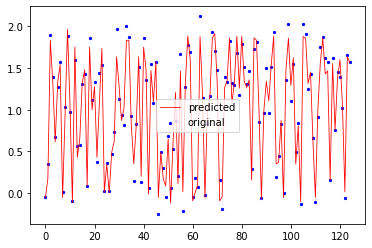

In [ ]:
import matplotlib.pyplot as plt


ypred = gbr.predict(X_test)
mse = mean_squared_error(y_test,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()